### Logistic Regression Exercise

In [28]:
# import numpy
import numpy as np

# import linear_model and datasets from sklearn
from sklearn import linear_model, datasets

# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

import seaborn as sns

In [29]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

* print the shape of X

In [30]:
X.shape

(150, 4)

In [31]:
iris.data[1]

array([4.9, 3. , 1.4, 0.2])

* print y

In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
y.shape

(150,)

* create a logistic regression model
    - **Note:** Spend some time on the logistic regression documentation to get familiar with the available parameters.

In [42]:
# Fit (train) the Logistic Regression classifier
clf = linear_model.LogisticRegression(C=1e40, solver='newton-cg')
fitted_model = clf.fit(X, y)



# Predict
prediction_result = clf.predict([(1, 4, 70,180)])

In [43]:
# For theta_0:
print( fitted_model.intercept_ )
# For theta_1 and theta_2:
print( fitted_model.coef_ )

[  2.41165286  20.1131034  -22.52475626]
[[  5.03145253   8.00474223 -13.3061477   -6.88025633]
 [ -1.28311657  -0.66192618   1.93837705  -5.70294546]
 [ -3.74833596  -7.34281604  11.36777065  12.58320178]]


* create a regularization space for the **'penalty'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [44]:
penalty = ['l1', 'l2', 'elasticnet']

* create a regularization space for the **'c'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [45]:
C = [0.25, .75, 1, 1.25, 1.5]

* create a hyperparameter options dictionary

In [46]:
options = {'penalty': ['l1', 'l2', 'elasticnet'], 'C' :[0.25, .75, 1, 1.25, 1.5]}

* create a grid search using 5-fold cross validation

In [47]:
from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("X_test: ", X_test)

X_test:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.7 1.5 0.4]
 [4.4 3.  1.3 0.2]
 [5.  3.5 1.3 0.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [6.2 2.2 4.5 1.5]
 [5.6 2.5 3.9 1.1]
 [6.3 2.5 4.9 1.5]
 [6.1 2.8 4.7 1.2]
 [6.  3.4 4.5 1.6]
 [6.3 2.3 4.4 1.3]
 [5.6 3.  4.1 1.3]
 [6.1 3.  4.6 1.4]
 [5.6 2.7 4.2 1.3]
 [6.2 2.9 4.3 1.3]
 [5.1 2.5 3.  1.1]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [5.7 2.5 5.  2. ]
 [6.4 3.2 5.3 2.3]
 [6.2 2.8 4.8 1.8]
 [7.4 2.8 6.1 1.9]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.7 3.3 5.7 2.5]]
X_test:  [[5.  3.6 1.4 0.2]
 [5.4 3.7 1.5 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.4 1.6 0.4]
 [5.4 3.4 1.5 0.4]
 [6.1 2.9 4.7 1.4]
 [5.8 2.7 4.1 1. ]
 [6.1 2.8 4.  1.3]
 [5.8 2.7 3.9 1.2]
 [6.  2.7 5.1 1.6]
 [5.4 3.  4.5 1.5]
 [5.8 2.6 4.  1.2]
 [5.7 3.  4.2 1.2]
 [5.7 2.8 4.1 1.3]
 [6.3 3.3 6.  2.5]
 [6.5 3.2 5.1 2. ]
 [6.4 2.7 5.3 1.9]
 [6.5 3.  5.5 1.8]
 [6.  2.2 5.  1.5]
 [6.9 3.2 5.7 2.3]
 [5.6 2.8 4.

* fit the grid search

In [48]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(clf, options)

# fit grid search
grid_fit = grid_search.fit(X_train, y_train)

/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score o

/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score o

* take the best model from grid search

In [49]:
best_model = grid_fit.best_params_

In [50]:
best_model

{'C': 1.5, 'penalty': 'l2'}

* print the best hyperparameters

In [51]:
# best parameter from options for best_model
best_model

{'C': 1.5, 'penalty': 'l2'}

* predict the target vector
    - class ( *predict* )
    - probabilities ( *predict_proba* )

In [52]:
estimator = grid_fit.best_estimator_.predict(X_test)

#predict_y = best_m.predict

In [53]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

- plot the ROC curve and print the AUC

In [20]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

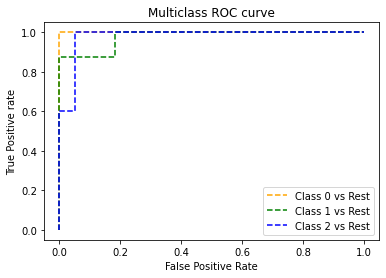

In [55]:
# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
import matplotlib.pyplot as plt

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

* print the Logreg coeficients

In [56]:
clf.coef_

/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.
  warnings.warn(msg, category=FutureWarning)


array([[-0.41414646,  0.84890656, -2.24328572, -0.932044  ],
       [-0.15841946, -2.05658509,  0.70595792, -1.28062407],
       [-0.36310916, -0.32791557,  2.73051578,  2.26695736]])

* print the Logreg intercepts

In [57]:
clf.intercept_

/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute intercept_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.
  warnings.warn(msg, category=FutureWarning)


array([[  6.34371551],
       [  5.25198922],
       [-13.82554809]])